In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

c:\python\project\.venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python\project\.venv\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\python\project\.venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('./inv1_emi_data_t345678.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[5]},
                index_col=['datetime']
                )

In [3]:
df['time'] = df.index
df.loc[:,'year'] = pd.Series(df.index.year, df.index)
df.loc[:,'month'] = pd.Series(df.index.month, df.index)
df.loc[:,'day'] = pd.Series(df.index.day, df.index)
df.loc[:,'hour'] = pd.Series(df.index.hour, df.index)
df.loc[:,'dayofweek'] = pd.Series(df.index.dayofweek, df.index)
df.loc[:,'dayname'] = pd.Series(df.index.day_name(), df.index)
df.loc[:,'hourofweek'] = pd.Series((df.hour+24*df.dayofweek), df.index)
df.loc[:,'hourofmonth'] = pd.Series((df.hour+24*(df.day-1)), df.index)
df.loc[:,'Tcell']=pd.Series((df['Ambient temperature(℃)']+df['Irradiance(W/㎡)']/800*(25-20)), df.index)
df.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df['Irradiance(W/㎡)']/1000*(1+0.0045*(df['Tcell']-25))*20.5/100), df.index)
df.loc[:,'Hieu suat']=pd.Series((df['Total input power(kW)']*1000/df['Pm']*100), df.index)
df.loc[:,'date'] = pd.Series(df.index.date, df.index)
df=df[df['Ambient temperature(℃)']>6]
df=df[df['Irradiance(W/㎡)']>300]
df=df[df['Total input power(kW)']>76]
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Site Name,Management Domain,ManageObject_x,Ambient temperature(℃),PV Temperature(℃),Wind speed(m/s),Wind direction(°),Daily irradiation(MJ/㎡),...,day,hour,dayofweek,dayname,hourofweek,hourofmonth,Tcell,Pm,Hieu suat,date
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-04 10:15:00,103,103,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.6,38.8,1.7,NaN,3.870,...,4,10,4,Friday,106,82,33.537500,73507.755992,117.519572,2022-03-04
2022-03-04 10:20:00,104,104,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.4,41.2,1.4,NaN,4.039,...,4,10,4,Friday,106,82,33.389375,99765.707730,87.514039,2022-03-04
2022-03-04 10:25:00,105,105,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.3,42.0,2.4,NaN,4.252,...,4,10,4,Friday,106,82,34.078750,119863.526665,74.654069,2022-03-04
2022-03-04 10:30:00,106,106,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.3,42.9,4.5,NaN,4.197,...,4,10,4,Friday,106,82,34.449375,129366.728410,70.359668,2022-03-04
2022-03-04 10:35:00,107,107,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.7,44.7,0.8,NaN,4.444,...,4,10,4,Friday,106,82,34.868125,130072.464747,69.792635,2022-03-04
2022-03-04 10:40:00,108,108,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.7,45.6,2.0,NaN,4.692,...,4,10,4,Friday,106,82,34.773750,127645.289181,70.346505,2022-03-04
2022-03-04 10:45:00,109,109,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.6,46.5,3.0,NaN,4.942,...,4,10,4,Friday,106,82,35.882500,133532.155492,69.440203,2022-03-04
2022-03-04 10:50:00,110,110,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,31.3,47.2,2.2,NaN,5.194,...,4,10,4,Friday,106,82,36.598125,134338.280105,69.244596,2022-03-04
2022-03-04 10:55:00,111,111,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.7,47.5,1.5,NaN,5.447,...,4,10,4,Friday,106,82,36.038750,135044.514571,69.166082,2022-03-04


In [4]:
df1=df.groupby(['month','date','hour'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()
df1=df1.reset_index()
df1=df1[df1.groupby(['month','date'])['Irradiance(W/㎡)'].transform(max)==df1['Irradiance(W/㎡)']]
df1=df1.reset_index()
df1.loc[:,'Tcell']=pd.Series((df1['Ambient temperature(℃)']+df1['Irradiance(W/㎡)']/800*(25-20)), df1.index)
df1.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df1['Irradiance(W/㎡)']/1000*(1+0.0045*(df1['Tcell']-25))*20.5/100), df1.index)
df1.loc[:,'Hieu suat']=pd.Series((df1['Total input power(kW)']*1000/df1['Pm']*100), df1.index)
df1=df1[df1['Hieu suat']<80]
print(df1)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Total input power(kW)'],
    name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 1 "))
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 1 "))
fig . update_traces (
    showlegend = True 
    )
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

     index  month        date  hour  Total input power(kW)  \
0        1      3  2022-03-04    11              91.416000   
1        3      3  2022-03-19    13              83.592000   
2        6      3  2022-03-22    11              97.287500   
3       13      3  2022-03-23    12              98.966091   
4       18      3  2022-03-24    12              93.225429   
..     ...    ...         ...   ...                    ...   
136    751      8  2022-08-19    12              98.099444   
137    758      8  2022-08-21    14             110.378000   
138    763      8  2022-08-22    12              99.210417   
139    768      8  2022-08-23    11              96.521833   
140    773      8  2022-08-24    11              88.329600   

     Ambient temperature(℃)  Irradiance(W/㎡)      Tcell             Pm  \
0                 23.300000       842.800000  28.567500  128974.542439   
1                  6.200000       829.800000  11.386250  117322.328147   
2                 32.416667      

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1294878710.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby(['month','date','hour'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()


In [5]:
df1['stt']=df1.index
df_binary = df1[['stt', 'Hieu suat']] 
  
# Taking only the selected two attributes from the dataset 
df_binary.columns = ['stt', 'Hieu suat'] 
  
# Renaming the columns for easier writing of the code 
df_binary.head() 
  
# Displaying only the 1st  rows along with the column names 

,stt,Hieu suat
0,0,70.879104
1,1,71.249865
2,2,66.434294
3,3,66.467154
4,4,62.574385


0.188552175272923


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\3909986184.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\3909986184.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



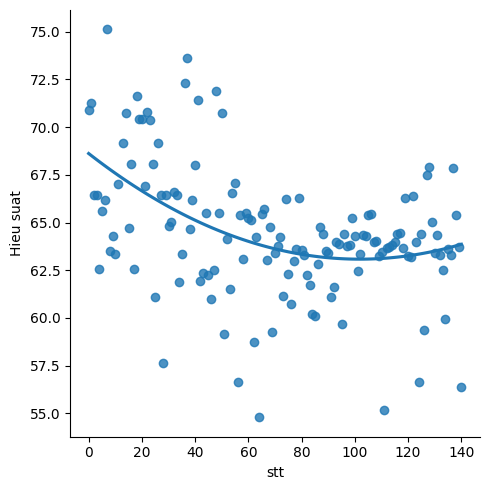

In [6]:
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary, order = 2, ci = None)
# Eliminating NaN or missing input numbers 
df_binary.fillna(method ='ffill', inplace = True)
X = np.array(df_binary['stt']).reshape(-1, 1) 
y = np.array(df_binary['Hieu suat']).reshape(-1, 1) 
  
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
df_binary.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

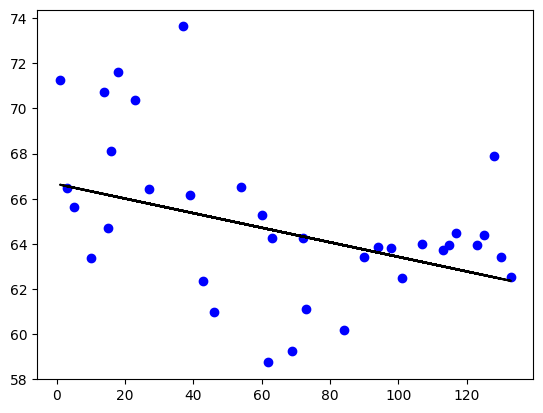

In [7]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

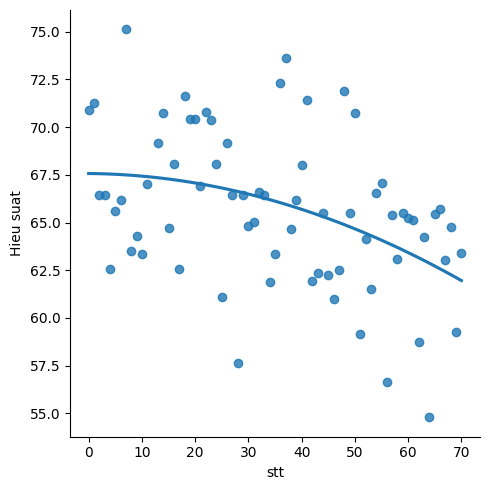

In [8]:
df_binary1 = df_binary[:][:70]
  
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary1, 
                               order = 2, ci = None)

In [9]:
df_binary1.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_binary1['stt']).reshape(-1, 1) 
y = np.array(df_binary1['Hieu suat']).reshape(-1, 1) 
  
df_binary1.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.1339018490582473


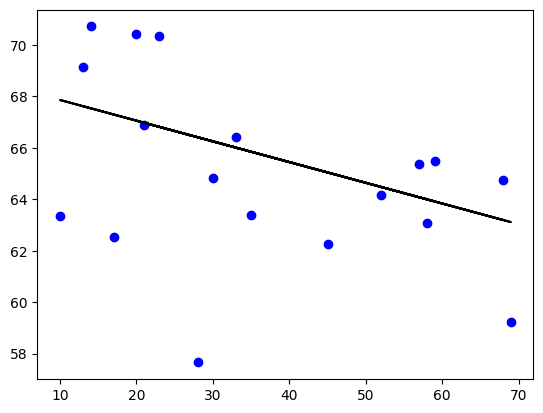

In [10]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

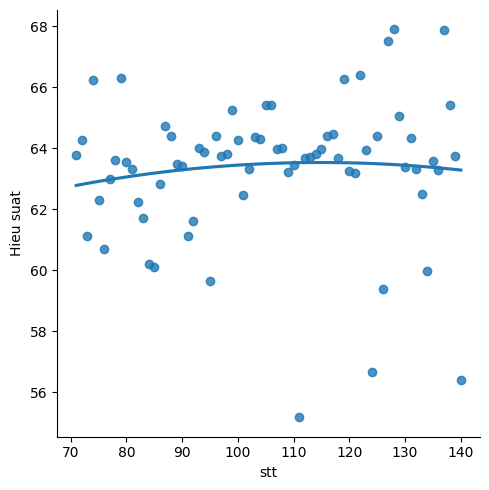

In [11]:
df_binary2 = df_binary[:][70:142]
  
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary2, 
                               order = 2, ci = None)

In [12]:
df_binary2.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_binary2['stt']).reshape(-1, 1) 
y = np.array(df_binary2['Hieu suat']).reshape(-1, 1) 
  
df_binary2.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

-0.05248140960862013


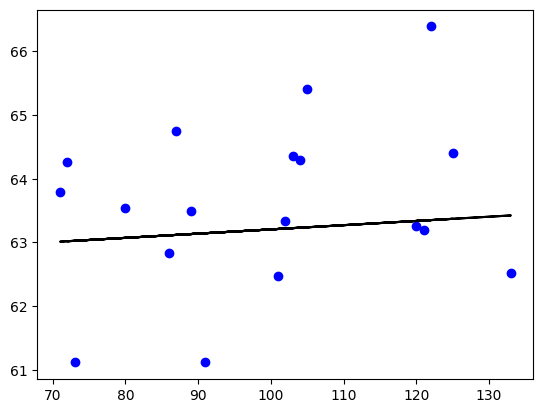

In [13]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

   index  month        date  hour  Total input power(kW)  \
0      1      3  2022-03-04    11              91.416000   
1      3      3  2022-03-19    13              83.592000   
2      6      3  2022-03-22    11              97.287500   
3     13      3  2022-03-23    12              98.966091   
4     18      3  2022-03-24    12              93.225429   
5     23      3  2022-03-25    11              99.168417   
6     29      3  2022-03-26    11              95.855750   
7     33      3  2022-03-28    10              97.298000   
8     39      3  2022-03-29    10              93.604500   
9     46      3  2022-03-30    12             104.197800   

   Ambient temperature(℃)  Irradiance(W/㎡)      Tcell             Pm  \
0               23.300000       842.800000  28.567500  128974.542439   
1                6.200000       829.800000  11.386250  117322.328147   
2               32.416667       917.966667  38.153958  146441.686633   
3               32.118182       934.127273  37.9564

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-1.3932665175757841


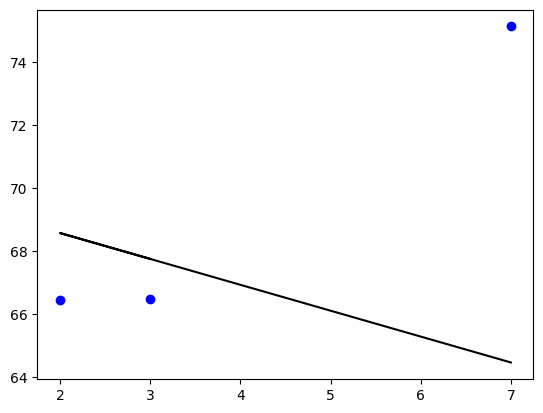

    index  month        date  hour  Total input power(kW)  \
10     52      4  2022-04-03    13             105.612667   
11     53      4  2022-04-04    12              79.340750   
12     55      4  2022-04-05    15              77.779000   
13     58      4  2022-04-06    13             101.972444   
14     63      4  2022-04-07    11             100.333636   
15     69      4  2022-04-08    11              93.552500   
16     75      4  2022-04-09    11             100.788444   
17     80      4  2022-04-10    12              85.401200   
18     84      4  2022-04-11    10              84.479333   
19     88      4  2022-04-12    11              87.508100   
20     91      4  2022-04-13    11              87.585111   
21     96      4  2022-04-14    11              90.048500   
22    101      4  2022-04-15    11              95.721333   
23    106      4  2022-04-16    11              95.721143   
24    113      4  2022-04-17    12             102.428818   
25    119      4  2022-0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



-0.9289631610698079


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



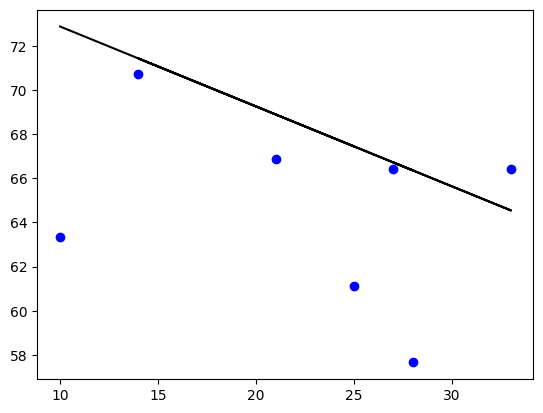

    index  month        date  hour  Total input power(kW)  \
36    176      5  2022-05-01    10              81.914000   
37    177      5  2022-05-02    11              80.420667   
38    179      5  2022-05-05    10              96.470500   
39    186      5  2022-05-06    11             103.003091   
40    192      5  2022-05-07    10              99.989750   
41    198      5  2022-05-08    11              82.323500   
42    199      5  2022-05-09    12              92.457429   
43    205      5  2022-05-10    11             106.506091   
44    211      5  2022-05-11    12              99.701375   
45    217      5  2022-05-12    11             100.470417   
46    222      5  2022-05-13    11             101.123400   
47    232      5  2022-05-14    13              93.439600   
48    234      5  2022-05-15     8              77.881000   
49    237      5  2022-05-16    10              97.988667   
50    242      5  2022-05-17     9              96.802400   
51    247      5  2022-0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



0.16065955551102518


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



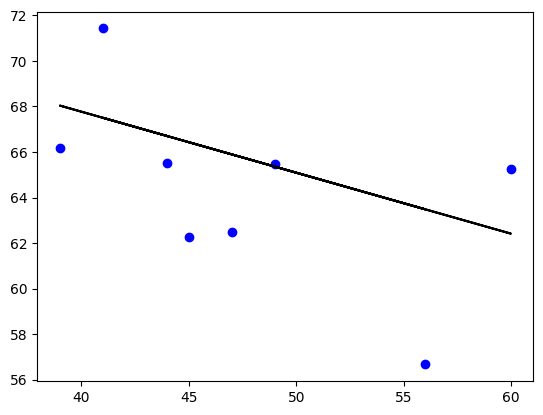

    index  month        date  hour  Total input power(kW)  \
65    329      6  2022-06-01    11              99.734500   
66    336      6  2022-06-02    11              96.982417   
67    343      6  2022-06-03    11              96.137583   
68    350      6  2022-06-04    11             100.772667   
69    357      6  2022-06-05    11              89.973900   
70    363      6  2022-06-06    11              95.290417   
71    369      6  2022-06-07    11              99.834417   
72    376      6  2022-06-08    12              96.604917   
73    383      6  2022-06-09    12              99.880333   
74    388      6  2022-06-10    11              83.473545   
75    392      6  2022-06-11    11              87.241182   
76    398      6  2022-06-12    11              93.904250   
77    404      6  2022-06-13    11              96.278417   
78    409      6  2022-06-14    10              88.326714   
79    415      6  2022-06-15    11              87.405000   
80    421      6  2022-0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



-0.4141002694390279


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



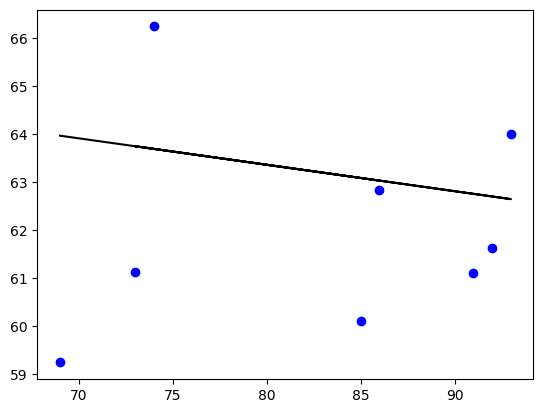

     index  month        date  hour  Total input power(kW)  \
94     503      7  2022-07-03    11              91.332182   
95     510      7  2022-07-04    13              92.330000   
96     513      7  2022-07-05    11             100.489909   
97     519      7  2022-07-06    11              94.056917   
98     524      7  2022-07-07    10              93.659818   
99     528      7  2022-07-08    10              89.838625   
100    533      7  2022-07-09    10              93.641500   
101    539      7  2022-07-11    12             100.628375   
102    545      7  2022-07-12    11              98.708667   
103    553      7  2022-07-13    12             100.921667   
104    560      7  2022-07-14    11              98.873250   
105    567      7  2022-07-15    11             100.058083   
106    573      7  2022-07-16    11              97.735917   
107    579      7  2022-07-17    11              96.260000   
108    585      7  2022-07-18    11              98.384500   
109    5

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-1.2756164728913197


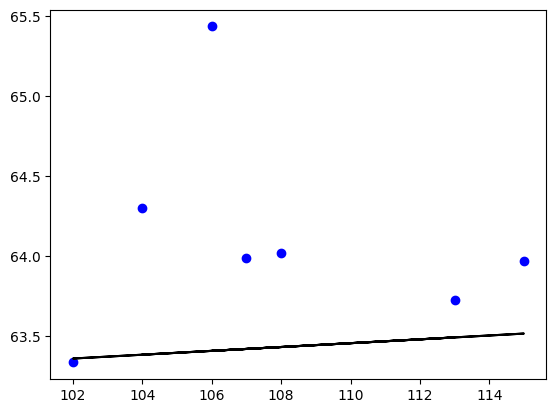

     index  month        date  hour  Total input power(kW)  \
122    673      8  2022-08-01    11              92.475545   
123    679      8  2022-08-02    11             100.262917   
124    685      8  2022-08-03    11             103.050500   
125    692      8  2022-08-04    11             100.184417   
126    699      8  2022-08-05    11              96.046417   
127    702      8  2022-08-06    11              82.080429   
128    703      8  2022-08-10     9              88.331667   
129    707      8  2022-08-12    12              89.798800   
130    712      8  2022-08-13    11              98.893250   
131    718      8  2022-08-14    11              98.903000   
132    724      8  2022-08-15    11             101.299500   
133    731      8  2022-08-16    11              98.392273   
134    738      8  2022-08-17    11              91.300778   
135    745      8  2022-08-18    12              98.815000   
136    751      8  2022-08-19    12              98.099444   
137    7

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18296\1072605691.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.32368426522580196


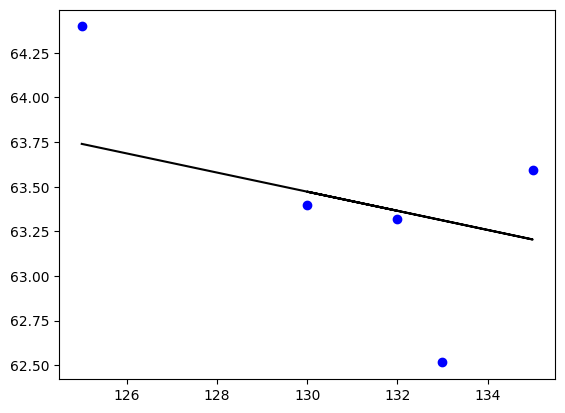

In [14]:
i=3
while i<=8:
    c=str(i)
    df1=df.groupby(['month','date','hour'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()
    df1=df1.reset_index()
    df1=df1[df1.groupby(['month','date'])['Irradiance(W/㎡)'].transform(max)==df1['Irradiance(W/㎡)']]
    df1=df1.reset_index()
    df1.loc[:,'Tcell']=pd.Series((df1['Ambient temperature(℃)']+df1['Irradiance(W/㎡)']/800*(25-20)), df1.index)
    df1.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df1['Irradiance(W/㎡)']/1000*(1+0.0045*(df1['Tcell']-25))*20.5/100), df1.index)
    df1.loc[:,'Hieu suat']=pd.Series((df1['Total input power(kW)']*1000/df1['Pm']*100), df1.index)
    df1=df1[df1['Hieu suat']<100]
    df1=df1[df1['month']==i]
    print(df1)
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df1['date'],
        y=df1['Total input power(kW)'],
        name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 1 tháng "+c))
    fig.add_trace(go.Scatter(
        x=df1['date'],
        y=df1['Hieu suat'],
        name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 1 tháng "+c))
    fig . update_traces (
        showlegend = True 
        )
    fig.update_xaxes(
        rangeslider_visible=True,
    )
    fig.show()
    df1['stt']=df1.index
    df_binary = df1[['stt', 'Hieu suat']] 
    
    # Taking only the selected two attributes from the dataset 
    df_binary.columns = ['stt', 'Hieu suat'] 
    
    # Renaming the columns for easier writing of the code 
    df_binary.head() 
    
    # Displaying only the 1st  rows along with the column names 
    # Eliminating NaN or missing input numbers 
    df_binary.fillna(method ='ffill', inplace = True)
    X = np.array(df_binary['stt']).reshape(-1, 1) 
    y = np.array(df_binary['Hieu suat']).reshape(-1, 1) 
    
    # Separating the data into independent and dependent variables 
    # Converting each dataframe into a numpy array  
    # since each dataframe contains only one column 
    df_binary.dropna(inplace = True) 
    
    # Dropping any rows with Nan values 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
    
    # Splitting the data into training and testing data 
    regr = LinearRegression() 
    
    regr.fit(X_train, y_train) 
    print(regr.score(X_test, y_test))
    y_pred = regr.predict(X_test) 
    plt.scatter(X_test, y_test, color ='b') 
    plt.plot(X_test, y_pred, color ='k') 
    
    plt.show() 
    i=i+1